In [1]:
import numpy as np
import pandas as pd
import mudata as md
import seaborn as sns
import matplotlib.pyplot as plt
from anndata import AnnData
from itertools import product
from pathlib import Path

In [2]:
from liana.method.sp._misty import plot_distance_weights, plot_neighbors, plot_performance, plot_importance, plot_contribution
from liana.method.sp._misty import misty

In [6]:
# absolute path makes debugging easier
input_path =  Path("..") / "data" / "synthetic" / "synthetic1.tsv"
synthetic1 = pd.read_csv(input_path, sep="\t", header=0)
synthetic1

,row,col,ECM,ligA,ligB,ligC,ligD,protE,protF,prodA,prodB,prodC,prodD,type
0,1,100,0.038547,0.833994,0.015739,0.235624,1.182722,1.177839,2.547241,0.382144,0.000000,0.000000,0.587997,CT1
1,1,11,0.032660,0.118783,0.010392,0.804265,0.100514,0.000000,0.386030,0.000000,0.000000,0.535805,0.000000,CT2
2,1,13,0.144418,0.524544,0.014046,0.333952,0.433791,1.669298,1.613711,0.472195,0.000000,0.000000,0.378996,CT1
3,1,14,0.387007,0.268938,0.036732,0.502025,0.240917,0.000000,0.912584,0.000000,0.000000,0.418435,0.000000,CT2
4,1,15,0.163465,0.195318,0.117590,0.232161,0.202901,0.000000,0.162344,0.000000,0.160016,0.000000,0.000000,CT4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4200,99,87,0.008472,0.338277,0.004946,0.463727,0.517004,2.318060,1.028541,0.292653,0.000000,0.000000,0.476143,CT1
4201,99,88,0.020485,0.153078,0.011906,0.776913,0.226723,0.000000,0.492773,0.000000,0.000000,0.592242,0.000000,CT2
4202,99,91,1.321538,0.064707,0.169091,0.356850,0.079695,1.783671,0.485263,0.000000,0.000000,0.000000,0.000000,CT3
4203,99,93,0.073143,0.099032,0.037465,0.778108,0.110953,0.000000,0.403671,0.000000,0.000000,0.624396,0.000000,CT2


In [4]:
pos = synthetic1[["row", "col"]].to_numpy()
pos

array([[  1, 100],
       [  1,  11],
       [  1,  13],
       ...,
       [ 99,  91],
       [ 99,  93],
       [ 99,  95]])

In [5]:
expr = synthetic1.drop(["row", "col", "type"], axis=1).to_numpy()
expr

array([[0.0385468 , 0.83399389, 0.01573892, ..., 0.        , 0.        ,
        0.5879969 ],
       [0.03266024, 0.1187827 , 0.01039155, ..., 0.        , 0.5358052 ,
        0.        ],
       [0.14441839, 0.5245439 , 0.01404577, ..., 0.        , 0.        ,
        0.37899616],
       ...,
       [1.32153825, 0.06470724, 0.16909078, ..., 0.        , 0.        ,
        0.        ],
       [0.07314317, 0.09903198, 0.03746486, ..., 0.        , 0.62439575,
        0.        ],
       [0.01476691, 0.04662604, 0.02779309, ..., 0.01415191, 0.        ,
        0.        ]])

In [6]:
targets = synthetic1.drop(["row", "col", "type"], axis=1).columns
predictors = targets
interactions = list(product(targets, predictors))

In [7]:
adata = AnnData(X=expr, obs=pd.DataFrame(index=np.arange(expr.shape[0])), var=pd.DataFrame(index=targets))
adata.obsm["spatial"] = pos
adata

/Users/pschafer/miniconda3/envs/misty_liana/lib/python3.8/site-packages/anndata/_core/anndata.py:117: ImplicitModificationWarning: Transforming to str index.


AnnData object with n_obs × n_vars = 4205 × 11
    obsm: 'spatial'

In [8]:
mdata = md.MuData(data={"rna": adata})
mdata.mod.keys()

dict_keys(['rna'])

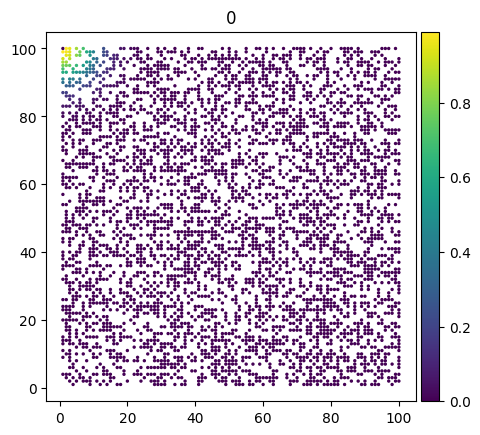

In [9]:
plot_distance_weights(mdata["rna"], bandwidth=10, cells=[0], kernel="gaussian", add_self=False, spatial_key="spatial", zoi=0, s=2)

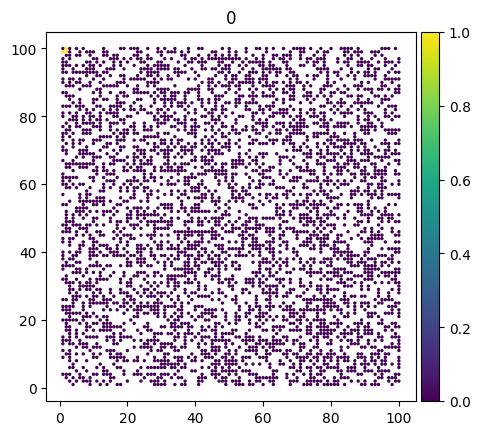

In [10]:
plot_neighbors(mdata["rna"], cells=[0], juxta_cutoff=np.inf, add_self=False, spatial_key="spatial", s=2)

In [11]:
misty(mdata=mdata, x_mod="rna", bandwidth=10, add_juxta=False, add_self=False, seed=42)

So these results look very similar! (just multiply by 100)

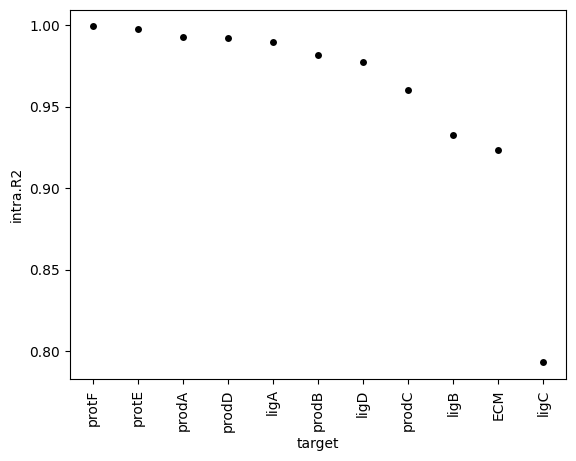

In [12]:
plot_performance(mdata.uns["misty_results"]["performances"], stat="intra.R2")

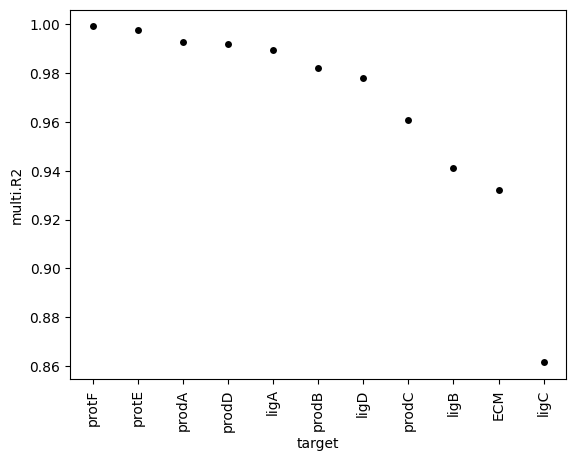

In [13]:
plot_performance(mdata.uns["misty_results"]["performances"], stat="multi.R2")

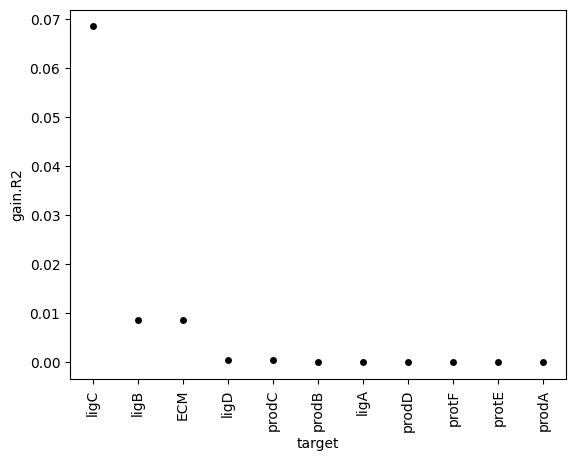

In [14]:
plot_performance(mdata.uns["misty_results"]["performances"], stat="gain.R2")

Let's check the contributions. Basically the intraview explains everything perfectly.

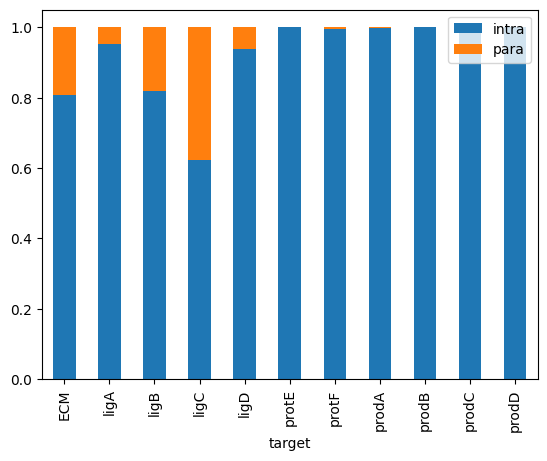

In [15]:
plot_contribution(mdata.uns["misty_results"]["contributions"])

Check the importance scores. This actually looks quite nice! Note in the scikit implementation the importances are normalized such that each row here sums to 1.

In [16]:
plot_importance(mdata.uns["misty_results"]["importances"], "intra")

predictor,ECM,ligA,ligB,ligC,ligD,prodA,prodB,prodC,prodD,protE,protF
target,,,,,,,,,,,
ECM,nan,0.007348,0.024001,0.058731,0.010230,0.163827,0.013218,0.008084,0.210687,0.372379,0.131494
ligA,0.001125,nan,0.004439,0.001945,0.867363,0.000144,0.000655,0.000270,0.000127,0.000442,0.123490
ligB,0.136799,0.028705,nan,0.013362,0.010735,0.001566,0.690812,0.003461,0.001219,0.002665,0.110677
ligC,0.031331,0.032618,0.042464,nan,0.033485,0.000000,0.012178,0.711833,0.000002,0.113064,0.023024
ligD,0.002598,0.920390,0.002804,0.002825,nan,0.010674,0.000561,0.000843,0.049898,0.000971,0.008437
prodA,0.000837,0.015140,0.000770,0.000535,0.008422,nan,nan,nan,0.969929,0.000583,0.003784
prodB,0.038479,0.000145,0.817991,0.000452,0.000198,nan,nan,0.000041,nan,0.004251,0.138443
prodC,0.006703,0.003802,0.009326,0.745446,0.004670,0.000224,0.110488,nan,0.000194,0.112822,0.006325
prodD,0.000980,0.005949,0.000866,0.000515,0.018151,0.970003,nan,nan,nan,0.000504,0.003031


In [17]:
plot_importance(mdata.uns["misty_results"]["importances"], "para")

predictor,ECM,ligA,ligB,ligC,ligD,prodA,prodB,prodC,prodD,protE,protF
target,,,,,,,,,,,
ECM,nan,0.081976,0.101328,0.095066,0.076977,0.085781,0.115375,0.110673,0.086962,0.142247,0.103615
ligA,0.105602,nan,0.070161,0.090204,0.147221,0.101806,0.063205,0.102951,0.122409,0.092106,0.104335
ligB,0.151686,0.076932,nan,0.094724,0.067543,0.067333,0.196705,0.089447,0.069490,0.100726,0.085413
ligC,0.106441,0.089170,0.074902,nan,0.076933,0.075929,0.071772,0.178993,0.064098,0.178145,0.083618
ligD,0.108296,0.140106,0.073467,0.082076,nan,0.127606,0.064801,0.102037,0.108945,0.097095,0.095571
prodA,0.081698,0.109370,0.070884,0.065949,0.135903,nan,0.069158,0.083503,0.199279,0.087298,0.096958
prodB,0.146631,0.076078,0.134910,0.107023,0.083448,0.072941,nan,0.103596,0.076871,0.111206,0.087297
prodC,0.110591,0.088285,0.072574,0.121627,0.086952,0.096473,0.079710,nan,0.089383,0.142154,0.112251
prodD,0.078468,0.142055,0.071294,0.066216,0.103759,0.193988,0.065763,0.087642,nan,0.095602,0.095213
